***Intraday Historical Data API from EODHD***, n addition to delivering comprehensive and historical intraday data, this API provides:

    Wide Market Coverage: Stocks (NYSE, NASDAQ), FOREX, cryptocurrencies, and more.
    Multiple Time Intervals: 1-minute, 5-minute, and 1-hour data (depending on availability).

    Extensive Historical Depth: Up to 17+ years for U.S. markets, 12+ years for FOREX/crypto.

Examples of Use Cases

    Algorithmic Trading: Develop, backtest, and refine strategies that rely on fast intraday signals, from simple moving averages to advanced machine learning models.
    Portfolio Analysis: Monitor multiple assets intraday to rebalance or hedge positions in real time.
    Research and Statistical Modeling: Gather data for correlation studies, volatility analyses, or event-driven research that requires precise time-stamping.

Prerequisites for Running the Code

Before we dive in, make sure you have the following in place:

1. Python 3.7+ installed on your system.
2. Libraries:

    -requests for making HTTP requests (pip install requests)
   
    -pandas for handling data frames (pip install pandas)
   
    -pandas_ta if you plan to use technical analysis indicators (pip install pandas_ta).
   
4. EODHD API Key: You’ll need a valid API key from EODHD. Sign up on their website, and make sure you store your key in a safe place. You can use the alternative free API key available here

5. Internet Connection: This is required to fetch data from the API in real time.

    {SYMBOL}: The ticker symbol followed by the market suffix. For instance, AAPL.US (Apple on NASDAQ), BTC-USD.CC (Bitcoin vs. USD in Crypto), EURUSD.FX (EUR/USD in Forex), etc.
    api_token: Your unique API Key from EODHD.
    interval: The intraday resolution you want. Common options include 1m, 5m, and 1h.
    from / to: Unix timestamps or supported date formats specifying your desired time range.
    fmt=json: Indicates you want the response in JSON format.

[

  {
    
    "t": 1664582400,     // Unix timestamp (Epoch code)
    "o": 140.51,         // Open price
    "h": 141.00,         // High price
    "l": 139.75,         // Low price
    "c": 140.30,         // Close price
    "v": 125400          // Volume
  },
  ...
  
]

Where:

    t: Unix timestamp (in UTC).
    o (open), h (high), l (low), c (close): Standard OHLC data for the interval.
    v: Traded volume during that interval (if available for that market).

**_Phase 1: Extracting Intraday Data from EODHD_**

Below, you’ll find a step-by-step guide to fetch and store intraday data in a Pandas DataFrame. We’ll specify dates in the friendly MM-DD-YYYY format, then convert them into Unix timestamps, which the API requires.

In [179]:
import requests
import json
import pandas as pd
import datetime
import time
import os
import pandas_ta as ta
import logging
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [180]:
# 1. Configuration
API_KEY = '67d6200c2f87e5.90891934'   # Replace with your actual API Key
symbol = 'NVDA.US'               
interval = '1m'                  # 1-minute intervals
from_date_str = '01-01-2025'     # MM-DD-Y (yyyy)
to_date_str   = '30-03-2025'     # MM-DD-Y (yyyy)
RSI_PERIOD = 14                  # default

# 2. Convert to Python datetime
from_date_obj = datetime.datetime.strptime(from_date_str, '%d-%m-%Y')
to_date_obj   = datetime.datetime.strptime(to_date_str, '%d-%m-%Y')

# 3. Convert to Unix timestamps
from_timestamp = int(from_date_obj.timestamp())
to_timestamp   = int(to_date_obj.timestamp())

In [181]:
#4. The Intraday Historical Data API endpoint typically follows this format:
url = (
    f'https://eodhistoricaldata.com/api/intraday/{symbol}'
    f'?api_token={API_KEY}'
    f'&interval={interval}'
    f'&from={from_timestamp}'
    f'&to={to_timestamp}'
    f'&fmt=json'
)


In [182]:
# 5. Fetch data
response = requests.get("https://eodhd.com/api/eod/NVDA.US?interval=1m&api_token= 67d6200c2f87e5.90891934&fmt=json") 
#https://eodhd.com/api/intraday/{TICKER}?interval={INTERVAL}&api_token={API_TOKEN}&fmt=json
print(response.status_code)

# Assuming response is an HTTP response object
text_content = response.text
# Convert to list by splitting on newlines
text_list = text_content.split('\n')
# Or convert to list by splitting on a different character
text_list = text_content.split(',')

print(text_list)

200
['[{"date":"2024-04-17"', '"open":883.4', '"high":887.75', '"low":839.5001', '"close":840.35', '"adjusted_close":84.0074', '"volume":495399525}', '{"date":"2024-04-18"', '"open":849.7', '"high":861.9', '"low":824.02', '"close":846.7101', '"adjusted_close":84.6432', '"volume":447260306}', '{"date":"2024-04-19"', '"open":831.5', '"high":843.24', '"low":756.0601', '"close":762.0001', '"adjusted_close":76.175', '"volume":875197961}', '{"date":"2024-04-22"', '"open":781.04', '"high":800.73', '"low":764', '"close":795.18', '"adjusted_close":79.4919', '"volume":596340464}', '{"date":"2024-04-23"', '"open":807.6901', '"high":827.6901', '"low":802.64', '"close":824.23', '"adjusted_close":82.3959', '"volume":438559406}', '{"date":"2024-04-24"', '"open":839.5001', '"high":840.82', '"low":791.8301', '"close":796.77', '"adjusted_close":79.6508', '"volume":512207535}', '{"date":"2024-04-25"', '"open":788.6801', '"high":833.2299', '"low":782.23', '"close":826.3201', '"adjusted_close":82.6049', '"

In [212]:
# 6. Convert to a Pandas DataFrame
if response.status_code == 200:             
    data_json = json.loads(response.text)
    df = pd.DataFrame(data_json)
    print(df)
else:
    print("Failed to retrieve data:", response.status_code)
    
    df.rename(columns={ 
        't': 'timestamp',
        'o': 'open',
        'h': 'high',
        'l': 'low',
        'c': 'close',
        'v': 'volume'
    }, inplace=True)
    # Convert timestamps to UTC datetime and set as index
   
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
    df.set_index('timestamp', inplace=True)

    print(df.head())
    print(df.tail())
    print(f"Error retrieving data: {response.status_code} - {response.text}")

          date     open      high       low   close  adjusted_close     volume
0   2025-01-02  136.000  138.8800  134.6300  138.31        138.2973  198247203
1   2025-01-03  140.010  144.9000  139.7300  144.47        144.4567  229322500
2   2025-01-06  148.590  152.1560  147.8201  149.43        149.4163  265377406
3   2025-01-07  153.030  153.1300  140.0100  140.14        140.1271  351782219
4   2025-01-08  142.580  143.9500  137.5600  140.11        140.0971  227349906
5   2025-01-10  137.450  139.9200  134.2200  135.91        135.8975  207602500
6   2025-01-13  129.990  133.4900  129.5100  133.23        133.2178  204808891
7   2025-01-14  136.050  136.3800  130.0500  131.76        131.7479  195590500
8   2025-01-15  133.650  136.4500  131.2900  136.24        136.2275  185217297
9   2025-01-16  138.640  138.7500  133.4900  133.57        133.5577  209235594
10  2025-01-17  136.690  138.5000  135.4649  137.71        137.6973  201188797
11  2025-01-21  139.160  141.8300  137.0900  140.83 

------------------------------------------------------------------------------------------------------------------------------------------------------

Once we have reliable market data at your fingertips, the next logical step is to automate how you act on it. A *trading bot* allows us to execute strategies systematically, free from human bias and around the clock. Whether you’re focusing on short-term signals or multi-day patterns, bots help you streamline the process of analyzing data, entering positions, and managing risk. In the next section, we’ll explore how to create a simple RSI-based trading bot using the data you’ve extracted.

-------------------------------------------------------------------------------------------------------------------------------------------------------
**_Phase 2: Simple RSI-Based Trading Bot_**
With high-quality intraday data in hand, you can begin experimenting with trading strategies. A good starting point is the RSI (Relative Strength Index), a momentum oscillator that fluctuates between 0 and 100. Traditionally:

    - RSI below 30: Potentially oversold (a buy signal for some traders).
    - RSI above 70: Potentially overbought (a sell signal for some traders).

Below is an example script that downloads the same data, calculates the RSI using pandas_ta, and outputs hypothetical buy/sell signals based on RSI thresholds.

In [218]:
    #  Calculate RSI with a 14-bar period
    df['RSI'] = ta.rsi(df['close'], length=14)

    #  Generate trading signals
    df['Signal'] = 0
    df.loc[df['RSI'] <= 30, 'Signal'] = 1   # Buy signal
    df.loc[df['RSI'] >= 70, 'Signal'] = -1  # Sell signal

    print(df[['open', 'high', 'low', 'close', 'volume', 'RSI', 'Signal']].head(100))

    #  Simulating trades
    position = 0  # 1 if holding a buy, -1 if short, 0 if neutral
    for idx, row in df.iterrows():
        if row['Signal'] == 1 and position == 0:
            print(f"{idx} => BUY at {row['close']:.2f} (RSI={row['RSI']:.2f})")
            position = 1
        elif row['Signal'] == -1 and position == 1:
            print(f"{idx} => SELL at {row['close']:.2f} (RSI={row['RSI']:.2f})")
            position = 0
    else:
            print(f"Error retrieving data: {response.status_code} - {response.text}") 

       open      high       low   close     volume        RSI  Signal
0   136.000  138.8800  134.6300  138.31  198247203        NaN       0
1   140.010  144.9000  139.7300  144.47  229322500        NaN       0
2   148.590  152.1560  147.8201  149.43  265377406        NaN       0
3   153.030  153.1300  140.0100  140.14  351782219        NaN       0
4   142.580  143.9500  137.5600  140.11  227349906        NaN       0
5   137.450  139.9200  134.2200  135.91  207602500        NaN       0
6   129.990  133.4900  129.5100  133.23  204808891        NaN       0
7   136.050  136.3800  130.0500  131.76  195590500        NaN       0
8   133.650  136.4500  131.2900  136.24  185217297        NaN       0
9   138.640  138.7500  133.4900  133.57  209235594        NaN       0
10  136.690  138.5000  135.4649  137.71  201188797        NaN       0
11  139.160  141.8300  137.0900  140.83  197748984        NaN       0
12  144.660  147.7900  143.6700  147.07  237651391        NaN       0
13  145.050  147.230

--------------------------------------------------------------------------------------------------------------------
***_Summary_***

1. Importing Libraries:

        requests for API requests,
        json for handling data,
        datetime for date manipulation,
        pandas for data processing,
        pandas_ta for technical analysis.

2. Configuration Parameters:

    API_KEY: API access key.
    symbol: Apple stock (AAPL.US).
    interval: Data with a 1-minute interval.
    from_date_str and to_date_str: Date range to fetch.

3. Date Conversion:

    Converts string dates into UNIX timestamps.

4. Constructing the URL and sending an HTTP request to the API:

    The request is sent to eodhistoricaldata.com with the defined parameters.

5. Data Processing:

    If the request is successful (status_code == 200), the response is converted into a Pandas DataFrame.
    Columns (o, h, l, c, v) are renamed to more meaningful names (open, high, low, close, volume).
    Timestamps are adjusted.

6. Calculating RSI:

    Uses pandas_ta.rsi with a 14-period setting.

7. Generating Trading Signals:

    Buy (Signal = 1): When RSI ≤ 30 (oversold).
    Sell (Signal = -1): When RSI ≥ 70 (overbought).

8. Simulating Trades:

    A position variable tracks if a trade is open.
    When a buy signal is generated, it prints a buy action with price and RSI.
    When a sell signal is generated, it prints a sell action with price and RSI.

9. Error Handling:

    If the API request fails, it displays an error message with the status code.

In [188]:
def plot_closing_price(
    ax: plt.Axes, 
    dataframe: pd.DataFrame, 
    ticker: str = "NVDA.US", 
    color: str = 'blue',  # Default color changed to match the plot
    linewidth: float = 2.0
) -> None:
    """ 
    (Docstring)
    Plots the closing price of a stock on the provided Axes object.

    Parameters:
        ax (plt.Axes): The Matplotlib Axes object to plot on.
        dataframe (pd.DataFrame): DataFrame containing stock data with a 'close' column.
        ticker (str): The stock ticker symbol for the title.
        color (str): Color of the line in the plot.
        linewidth (float): Width of the line in the plot.

    Returns:
        None
    """
    
    # Plot Closing Price
    ax.plot(dataframe.index, dataframe['close'], label='Close Price', color=color, linewidth=linewidth)
    
    # Set Titles & Labels
    ax.set_title(f"{ticker} - Closing Price", fontsize=14, fontweight='bold')
    ax.set_ylabel("Price ($)", fontsize=12)
    
    # Improve Readability
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better visibility

# Example usage:
# fig, ax = plt.subplots()
# plot_closing_price(ax, your_dataframe_here, ticker="AAPL.US")
# plt.show()

In [232]:
def create_price_rsi_plot(dataframe: pd.DataFrame, rsi: pd.Series, figsize: tuple = (12, 6)) -> tuple[plt.Figure, list[plt.Axes]]:
    """
    Creates a plot with two subplots: one for the closing price and another for the RSI.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing stock data with a 'close' column.
        rsi (pd.Series): Series containing RSI values.
        figsize (tuple): Size of the figure.

    Returns:
        tuple: A tuple containing the Figure and a list of Axes objects.
    """
    fig, axs = plt.subplots(nrows=2, figsize=figsize, sharex=True)

    # Plot Closing Price
    axs[0].plot(dataframe.index, dataframe['close'], label='Close Price', color='blue', linewidth=1.5)
    axs[0].set_title("Closing Price", fontsize=14, fontweight='bold')
    axs[0].set_ylabel("Price (USD)", fontsize=12)
    axs[0].legend()
    axs[0].grid(True, linestyle="--", alpha=0.6)

    # Plot RSI
    axs[1].plot(rsi.index, rsi, label='RSI', color='orange', linewidth=1.5)
    axs[1].axhline(70, linestyle='--', color='red', alpha=0.5)  # Overbought line
    axs[1].axhline(30, linestyle='--', color='green', alpha=0.5)  # Oversold line
    axs[1].set_title("Relative Strength Index (RSI)", fontsize=14, fontweight='bold')
    axs[1].set_ylabel("RSI", fontsize=12)
    axs[1].legend()
    axs[1].grid(True, linestyle="--", alpha=0.6)

    # Improve x-axis visibility
    axs[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better visibility

    plt.xlabel("Date", fontsize=12)
    
    return fig, axs

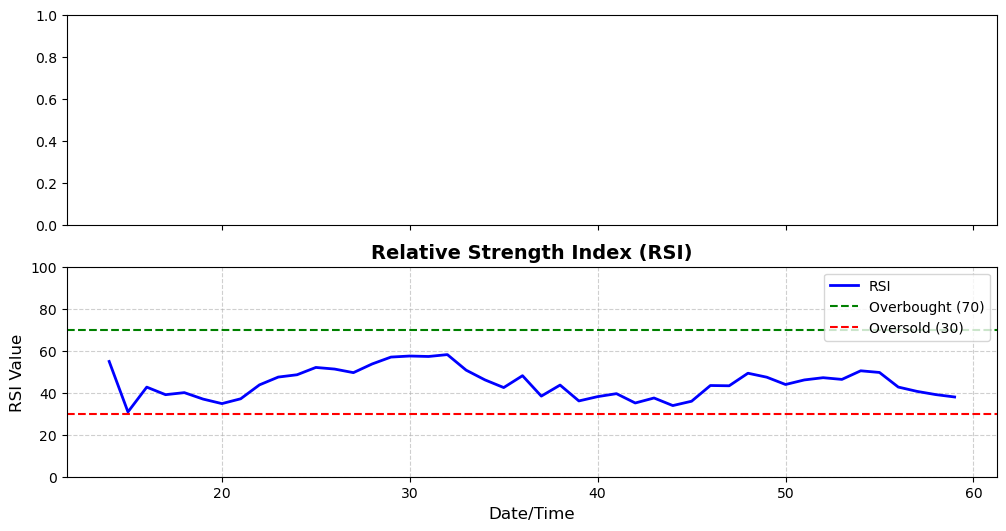

In [226]:
def plot_rsi(ax, df):
   
    #Ensure RSI exists in the dataframe
    if 'RSI' not in df.columns:
        print("Error: RSI column not found in DataFrame.")
        return
    
    #Plot RSI line
    ax.plot(df.index, df['RSI'], label="RSI", color="blue", linewidth=2.0)
    
    #Overbought & Oversold Levels
    overbought_level, oversold_level = 70, 30
    ax.axhline(overbought_level, linestyle="--", color="green", label=f"Overbought ({overbought_level})")
    ax.axhline(oversold_level, linestyle="--", color="red", label=f"Oversold ({oversold_level})")
    
    #Format the chart
    ax.set_title("Relative Strength Index (RSI)", fontsize=14, fontweight="bold")
    ax.set_ylabel("RSI Value", fontsize=12)
    ax.set_xlabel("Date/Time", fontsize=12)
    
    #Set Y-axis limits (optional)
    ax.set_ylim(0, 100)
    
    #Enable grid and legend
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

#Usage Example
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True)
plot_rsi(axs[1], df)
plt.show()

**Visualization**

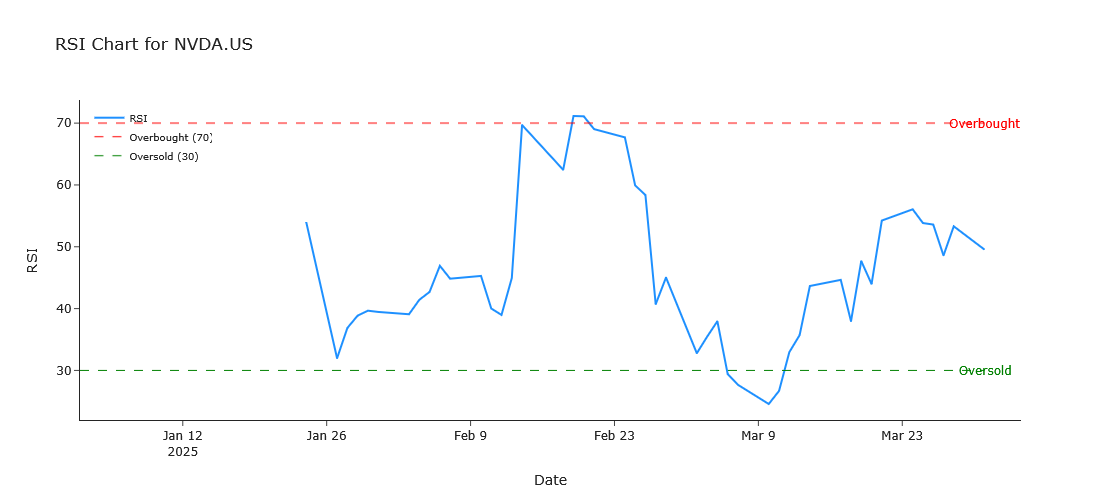

In [228]:
# Configuration
symbol = "NVDA.US"
interval = "10m"
range_days = "90d"
api_key = "67d6200c2f87e5.90891934"   # Replace with your actual API Key
from_date_str = '01-01-2025'     # MM-DD-Y (yyyy)
to_date_str   = '31-03-2025'     # MM-DD-Y (yyyy)

url = f"https://eodhistoricaldata.com/api/eod/NVDA.US?api_token=67d6200c2f87e5.90891934&from=01-01-2025&to=31-03-2025&fmt=json"

# Fetch historical/eod data
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Convert and sort data
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

# Calculate RSI
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(RSI_PERIOD).mean()
avg_loss = loss.rolling(RSI_PERIOD).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI with Plotly
fig = go.Figure()

# RSI Line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['RSI'],
    mode='lines',
    name='RSI',
    line=dict(color='dodgerblue', width=2)
))

# Overbought line (70)
fig.add_trace(go.Scatter(
    x=[df.index[0], df.index[-1]],
    y=[70, 70],
    mode='lines',
    name='Overbought (70)',
    line=dict(color='red', width=1, dash='dash'),
    showlegend=True
))

# Oversold line (30)
fig.add_trace(go.Scatter(
    x=[df.index[0], df.index[-1]],
    y=[30, 30],
    mode='lines',
    name='Oversold (30)',
    line=dict(color='green', width=1, dash='dash'),
    showlegend=True
))

# Text annotations
fig.add_annotation(x=df.index[-1], y=70, text="Overbought", showarrow=False, font=dict(color="red"))
fig.add_annotation(x=df.index[-1], y=30, text="Oversold", showarrow=False, font=dict(color="green"))

# Layout
fig.update_layout(
    title=f"RSI Chart for {symbol}",
    xaxis_title="Date",
    yaxis_title="RSI",
    legend=dict(x=0.01, y=0.99, bgcolor="rgba(0,0,0,0)", font=dict(size=10)),
    template="simple_white",
    height=500
)

fig.show()

In [193]:
# Configuration
symbol = "NVDA.US"
interval = "15m"
range_days = "90d"
api_key = "67d6200c2f87e5.90891934"   # Replace with your actual API Key
from_date_str = '01-01-2025'     # MM-DD-Y (yyyy)
to_date_str   = '31-03-2025'     # MM-DD-Y (yyyy)

url = f"https://eodhistoricaldata.com/api/eod/NVDA.US?api_token=67d6200c2f87e5.90891934&from=01-01-2025&to=31-03-2025&fmt=json"
# Fetch data
response = requests.get(url)
data = response.json()

# Check structure
print("Sample record from response:")
print(data[:5]) # Preview first 5 sliced entry

Sample record from response:
[{'date': '2025-01-02', 'open': 136, 'high': 138.88, 'low': 134.63, 'close': 138.31, 'adjusted_close': 138.2973, 'volume': 198247203}, {'date': '2025-01-03', 'open': 140.01, 'high': 144.9, 'low': 139.73, 'close': 144.47, 'adjusted_close': 144.4567, 'volume': 229322500}, {'date': '2025-01-06', 'open': 148.59, 'high': 152.156, 'low': 147.8201, 'close': 149.43, 'adjusted_close': 149.4163, 'volume': 265377406}, {'date': '2025-01-07', 'open': 153.03, 'high': 153.13, 'low': 140.01, 'close': 140.14, 'adjusted_close': 140.1271, 'volume': 351782219}, {'date': '2025-01-08', 'open': 142.58, 'high': 143.95, 'low': 137.56, 'close': 140.11, 'adjusted_close': 140.0971, 'volume': 227349906}]


In [194]:
# Convert to DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])  # Correct column name
df.set_index('date', inplace=True)
df.sort_index(inplace=True)


# Plot candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(
    title=f'{symbol} Intraday Candlestick Chart ({interval})',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='seaborn',
    height=600
)

fig.show()

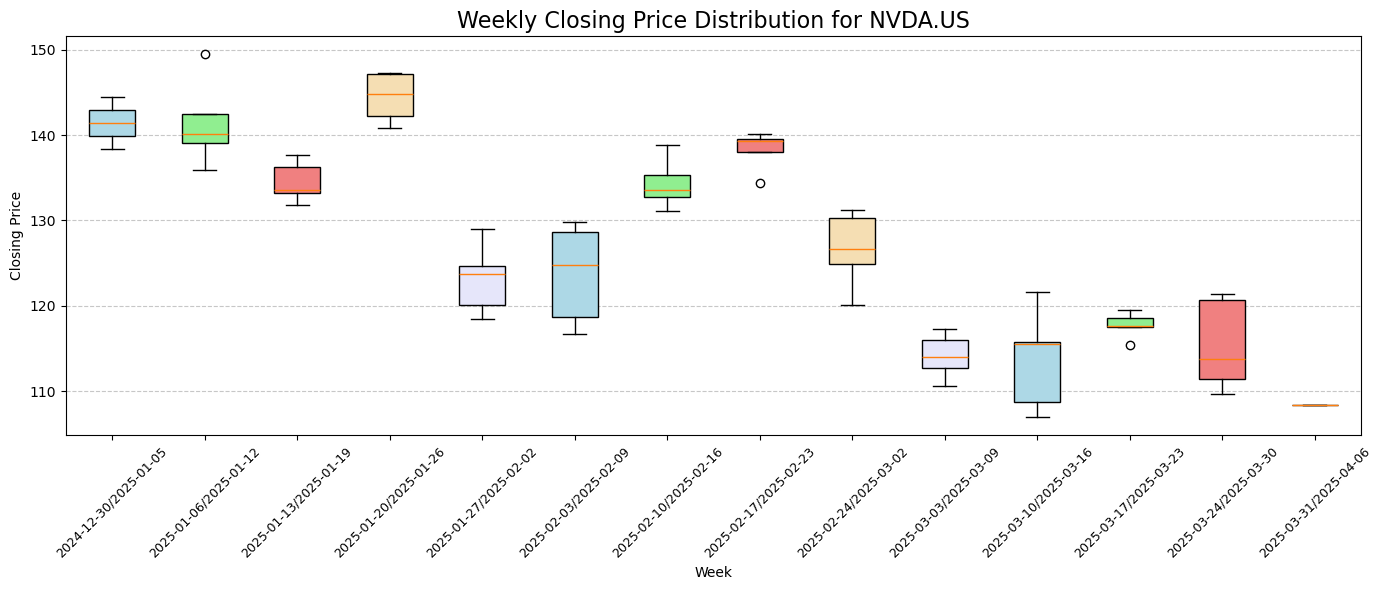

In [195]:

# Configuration
symbol = "NVDA.US"
interval = "30m"
range_days = "90d"
api_key = "67d6200c2f87e5.90891934"   # Replace with your actual API Key
from_date_str = '01-01-2025'     # MM-DD-Y (yyyy)
to_date_str   = '31-03-2025'     # MM-DD-Y (yyyy)

url = f"https://eodhd.com/api/eod/NVDA.US?interval=5m&range=1d&api_token=67d6200c2f87e5.90891934&fmt=json"
# Fetch data
response = requests.get(url)
data = response.json()

# === API REQUEST ===
url = f"https://eodhistoricaldata.com/api/eod/NVDA.US?api_token=67d6200c2f87e5.90891934&from=01-01-2025&to=31-03-2025&fmt=json"
response = requests.get(url)

# === ERROR HANDLING ===
if response.status_code != 200:
    raise Exception(f"API request failed with status {response.status_code}: {response.text}")

# === PARSE JSON TO DATAFRAME ===
data = response.json()
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)


# === GROUP BY WEEK ===
df['week'] = df.index.to_period('W')
weekly_close = df.groupby('week')['close'].apply(list)

# === PREPARE DATA FOR BOXPLOT ===
box_data = weekly_close.tolist()
week_labels = [str(week) for week in weekly_close.index]

# === PLOT BOXPLOT ===
plt.figure(figsize=(14, 6))
box = plt.boxplot(box_data, patch_artist=True)

# === COLOR STYLING ===
colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat', 'lavender']
for patch, color in zip(box['boxes'], colors * (len(box['boxes']) // len(colors) + 1)):
    patch.set_facecolor(color)

plt.title(f'Weekly Closing Price Distribution for {symbol}', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Closing Price')
plt.xticks(ticks=range(1, len(week_labels)+1), labels=week_labels, rotation=45, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()